<a href="https://colab.research.google.com/github/Anahitabehbood/verbose-octo-telegram/blob/main/dry_bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import io
import requests

# دانلود مستقیم از UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

# استخراج فایل‌ها
z.extractall()

# خواندن فایل Excel
df = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')
print("داده‌ها با موفقیت بارگیری شدند!")
display(df.head())

داده‌ها با موفقیت بارگیری شدند!


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# سلول 1: وارد کردن کتابخانه‌های ضروری
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score,
                            roc_auc_score,
                            roc_curve)
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# تنظیمات نمایش
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# سلول 2: بارگیری داده ها# دانلود دستی数据集 از لینک زیر در صورت نیاز:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
try:
    df = pd.read_excel('Dry_Bean_Dataset.xlsx')
    print("داده‌ها با موفقیت بارگیری شدند!")
    print(f"تعداد نمونه‌ها: {df.shape[0]}")
    print(f"تعداد ویژگی‌ها: {df.shape[1]}")
except:
    print("خطا در بارگیری فایل. لطفا از وجود فایل مطمئن شوید.")

خطا در بارگیری فایل. لطفا از وجود فایل مطمئن شوید.


In [ ]:
# سلول 3: نمایش نمونه‌ای از داده‌ها
print("\nنمونه‌ای از داده‌ها:")
display(df.head(3))


نمونه‌ای از داده‌ها:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [ ]:
# سلول 4: تحلیل اکتشافی داده‌ها (EDA)
print("\n=== تحلیل اولیه داده‌ها ===")
print("\nاطلاعات ستون‌ها:")
print(df.info())

print("\nآمار توصیفی:")
display(df.describe().transpose())

print("\nتوزیع کلاس‌ها:")
class_dist = df['Class'].value_counts()
display(class_dist)



=== تحلیل اولیه داده‌ها ===

اطلاعات ستون‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class      

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677



توزیع کلاس‌ها:


,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
# سلول 5: تحلیل مقادیر گم‌شده و تکراری
print("\n=== تحلیل مقادیر گم‌شده ===")
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

print(f"\nتعداد داده‌های تکراری: {df.duplicated().sum()}")


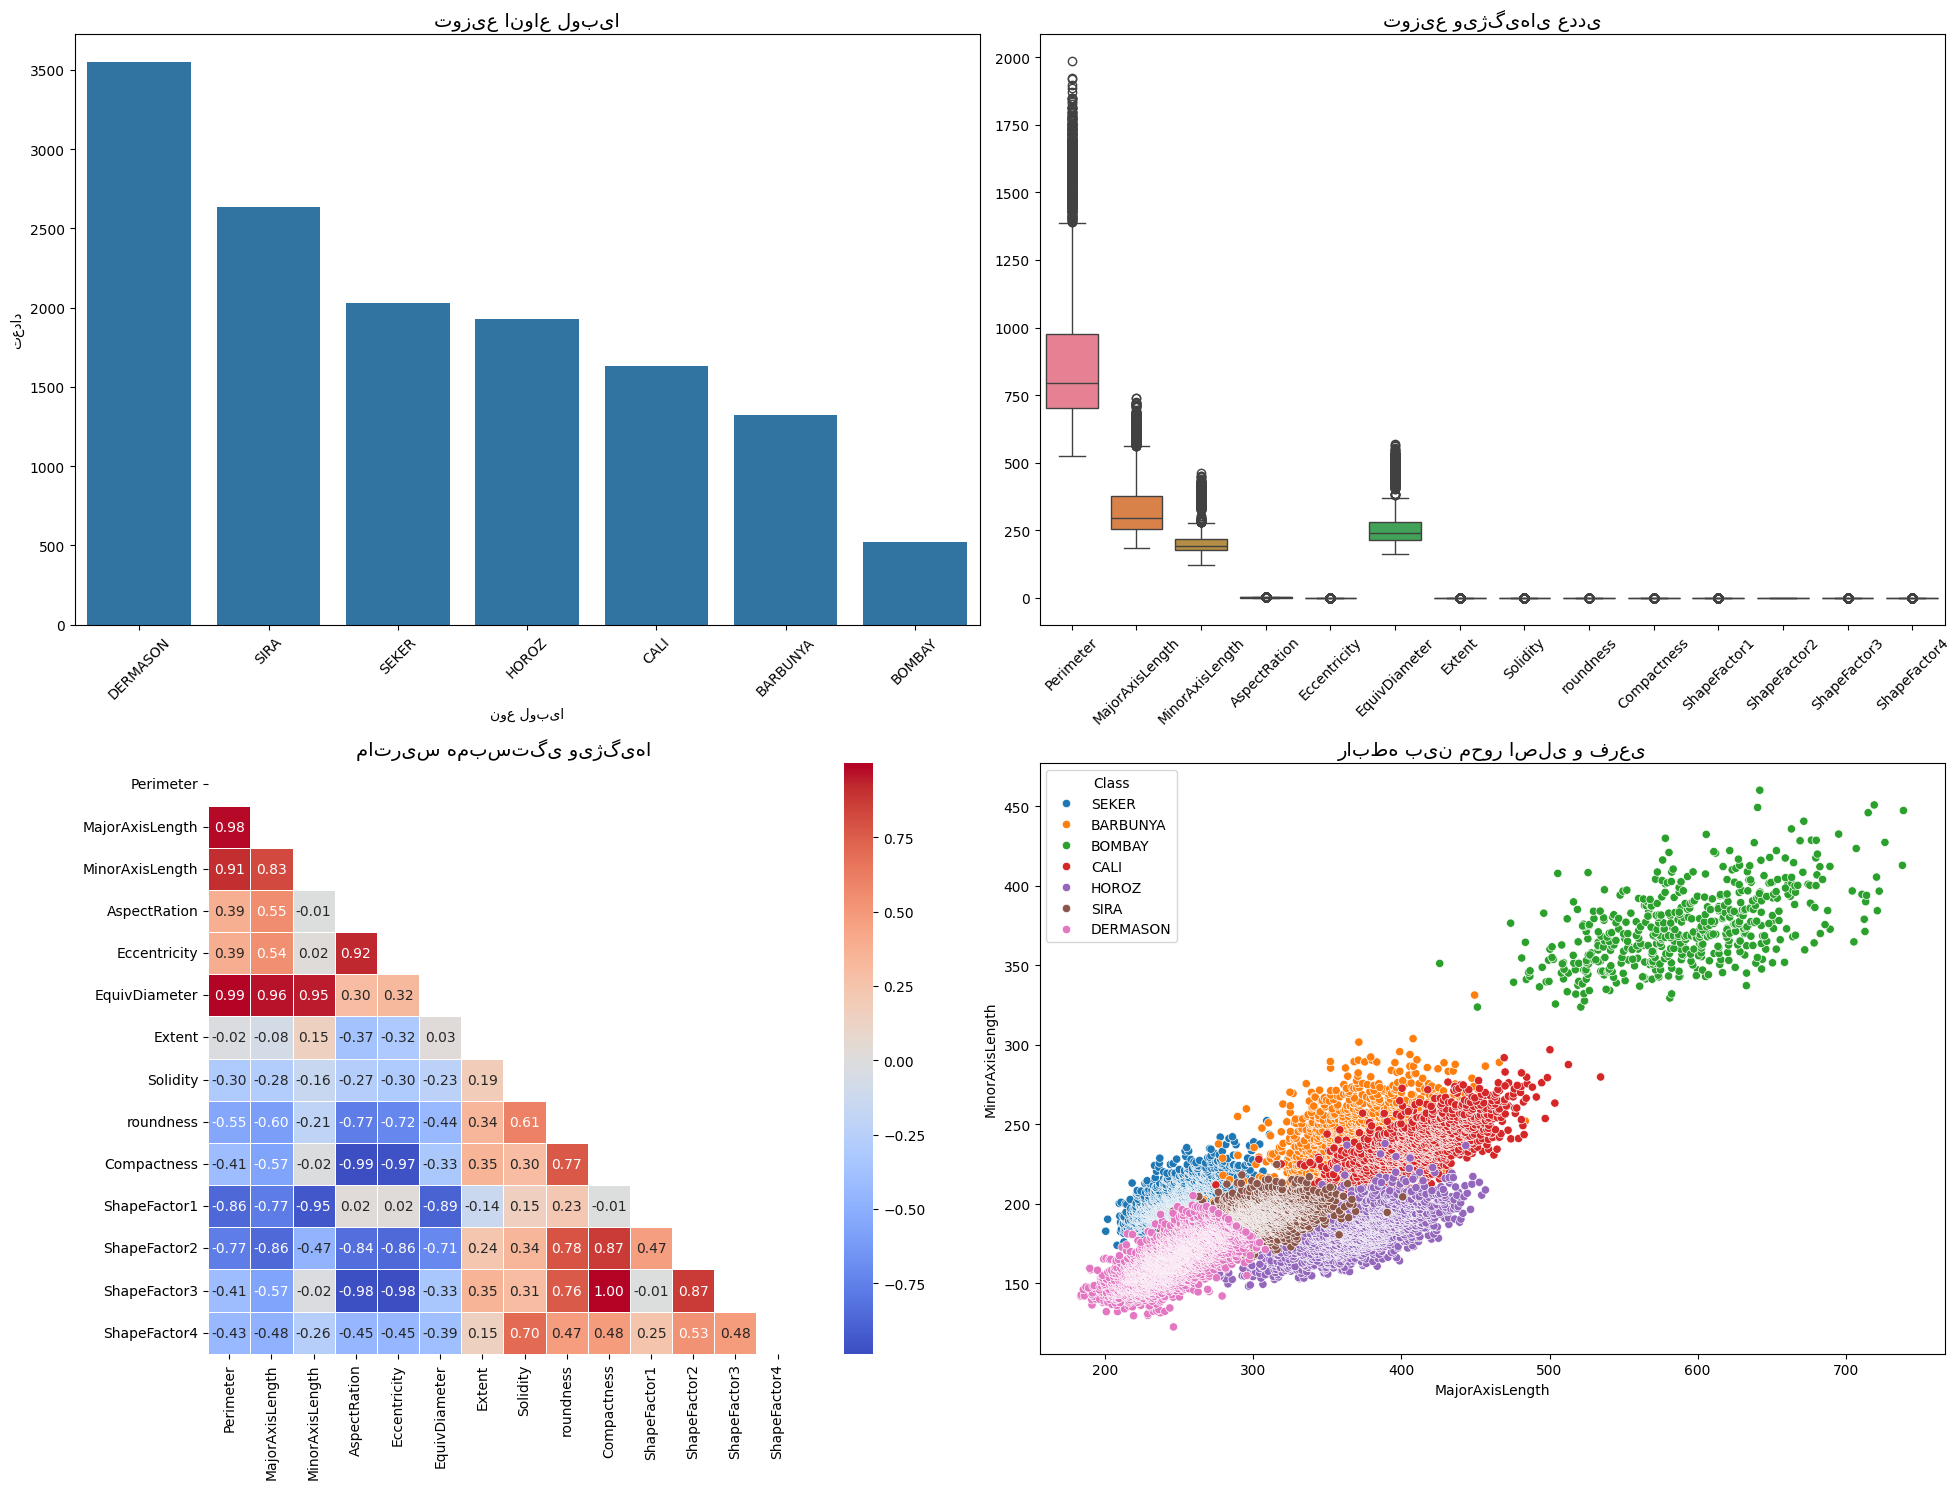

In [ ]:
# سلول 6: نمودارهای EDA
plt.figure(figsize=(20, 15))

# نمودار 1: توزیع کلاس‌ها
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Class', order=class_dist.index)
plt.title("توزیع انواع لوبیا", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('نوع لوبیا')
plt.ylabel('تعداد')

# نمودار 2: توزیع ویژگی‌های عددی
plt.subplot(2, 2, 2)
sns.boxplot(data=df.select_dtypes(include=['float64']))
plt.title("توزیع ویژگی‌های عددی", fontsize=14)
plt.xticks(rotation=45)

# نمودار 3: ماتریس همبستگی
plt.subplot(2, 2, 3)
corr_matrix = df.select_dtypes(include=['float64']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, square=True, linewidths=.5)
plt.title("ماتریس همبستگی ویژگی‌ها", fontsize=14)

# نمودار 4: تحلیل چند متغیره
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='MajorAxisLength', y='MinorAxisLength', hue='Class')
plt.title("رابطه بین محور اصلی و فرعی", fontsize=14)

plt.tight_layout()
plt.savefig('bean_eda_plots.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# سلول 7: تحلیل آماری پیشرفته
print("\n=== تحلیل چولگی و کشیدگی ===")
numeric_cols = df.select_dtypes(include=['float64']).columns
skewness = df[numeric_cols].apply(lambda x: skew(x.dropna()))
kurt = df[numeric_cols].apply(lambda x: kurtosis(x.dropna()))
stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
display(stats_df)


=== تحلیل چولگی و کشیدگی ===


,Skewness,Kurtosis
Perimeter,1.625944,3.586365
MajorAxisLength,1.357666,2.530531
MinorAxisLength,2.237964,6.648183
AspectRation,0.582509,0.113332
Eccentricity,-1.062707,1.386505
EquivDiameter,1.948743,5.189709
Extent,-0.895250,0.642642
Solidity,-2.549812,12.794479
roundness,-0.635679,0.373728
Compactness,0.037111,-0.223818


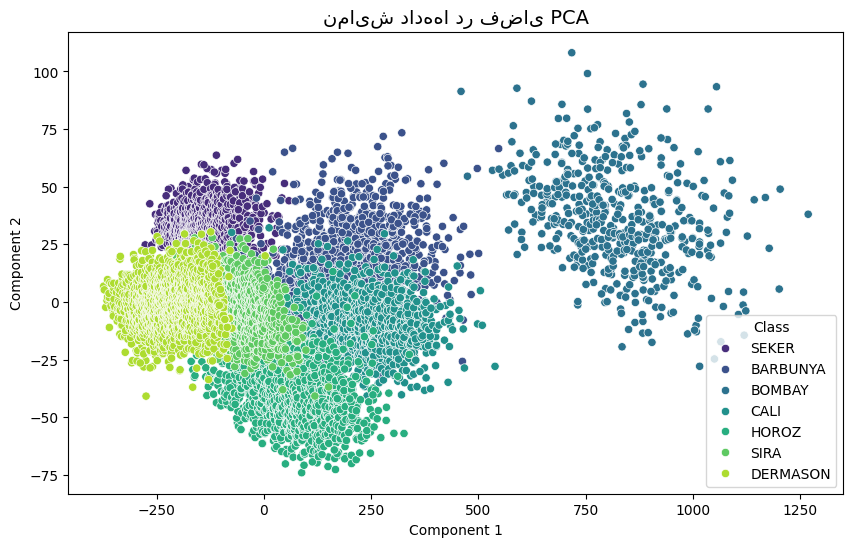

In [ ]:
# سلول 8: کاهش ابعاد با PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.select_dtypes(include=['float64']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Class'], palette='viridis')
plt.title('نمایش داده‌ها در فضای PCA', fontsize=14)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('bean_pca_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# سلول 9: پیش‌پردازش داده‌ها
# کدگذاری برچسب‌ها
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

# جداسازی ویژگی‌ها و برچسب
X = df.drop(['Class', 'Class_encoded'], axis=1)
y = df['Class_encoded']

# استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(f"\nتعداد نمونه‌های آموزشی: {X_train.shape[0]}")
print(f"تعداد نمونه‌های آزمون: {X_test.shape[0]}")



تعداد نمونه‌های آموزشی: 10888
تعداد نمونه‌های آزمون: 2723


In [ ]:
# سلول 10: مدل‌سازی با Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# پیش‌بینی
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

In [ ]:
# سلول 11: ارزیابی مدل
print("\n=== ارزیابی مدل ===")
print("گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nماتریس درهم‌ریختگی:")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('ماتریس درهم‌ریختگی', fontsize=14)
plt.xlabel('پیش‌بینی')
plt.ylabel('واقعیت')
plt.savefig('bean_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


=== ارزیابی مدل ===
گزارش طبقه‌بندی:


NameError: name 'y_pred' is not defined

In [ ]:
# سلول 12: منحنی ROC
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc_score(y_test==i, y_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('نرخ مثبت کاذب')
plt.ylabel('نرخ مثبت واقعی')
plt.title('منحنی ROC برای کلاس‌های مختلف', fontsize=14)
plt.legend()
plt.savefig('bean_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'y_proba' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# سلول 13: اهمیت ویژگی‌ها
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('اهمیت ویژگی‌ها در مدل Random Forest', fontsize=14)
plt.xlabel('میزان اهمیت')
plt.ylabel('ویژگی‌ها')
plt.savefig('bean_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# سلول 14: تنظیم هیپرپارامترها
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                          param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nبهترین پارامترها:")
print(grid_search.best_params_)

print("\nدقت بهترین مدل روی داده آزمون:")
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(f"دقت: {accuracy_score(y_test, y_pred_best):.4f}")


بهترین پارامترها:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}

دقت بهترین مدل روی داده آزمون:
دقت: 0.9218
